## Tarea 1
### Isaac Rodríguez Bribiesca

In [1]:
import nltk
import numpy as np
import matplotlib.pyplot as plt

## Actividad 1: Procesamiento básico

##### 1, 2. Read html data with beautiful soup

In [9]:
from bs4 import BeautifulSoup

with open('noticia.html', 'r') as file:
    
    data = file.read()
    
soup = BeautifulSoup(data, 'html.parser')

Extract text

In [26]:
text_list = [p.get_text().replace("\n", "").replace("\t", "").replace("\xa0", "") for p in soup.find_all("p")]
text = " ".join(text_list)

##### 3. RegexpTokenizer

In [41]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('[^\W\d_]+')

tokens = tokenizer.tokenize(text)

print("Primeros 10 tokens: ", tokens[:10])

Primeros 10 tokens:  ['Estudiantes', 'acusan', 'a', 'la', 'Universidad', 'de', 'Guanajuato', 'de', 'ignorar', 'el']


##### 4. Load tokens in Text object

In [43]:
from nltk.text import Text

noticia = Text(tokens)

##### 5. Visualize concordance of some words

In [44]:
print(noticia.concordance('guanajuato'))

Displaying 15 of 15 matches:
iantes acusan a la Universidad de Guanajuato de ignorar el pliego petitorio qu
imiento a su pliego Foto Especial Guanajuato Guanajuato Hemos sido ignorados p
u pliego Foto Especial Guanajuato Guanajuato Hemos sido ignorados por aquellas
 estudiantil de la Universidad de Guanajuato acusa en un manifiesto la forma e
 aseguraron que la Universidad de Guanajuato en un intento por apagar nuestro 
nes que integró la Universidad de Guanajuato Esta tarde la Universidad informó
estigaciones Foto staff AM Celaya Guanajuato Vecinos de la colonia Lázaro Cárd
 José Antonio Castro Murillo León Guanajuato Antes de terminar el año el Museo
e cobro de plaza Foto Saúl Castro Guanajuato Guanajuato Comerciantes de mercad
plaza Foto Saúl Castro Guanajuato Guanajuato Comerciantes de mercados de puest
día tomarán la caseta de cuota de Guanajuato a Silao Queridos lectores nuestro
aira Gasca Niega el Gobernador de Guanajuato que se hayan sido liberados los t
idos en Celaya Foto Yaj

##### 6. Plot 50 most frequent words

Build FreqDist object filtering spanish stopwords

In [53]:
word_frequency = nltk.FreqDist(w.lower() for w in noticia if w not in nltk.corpus.stopwords.words('spanish'))

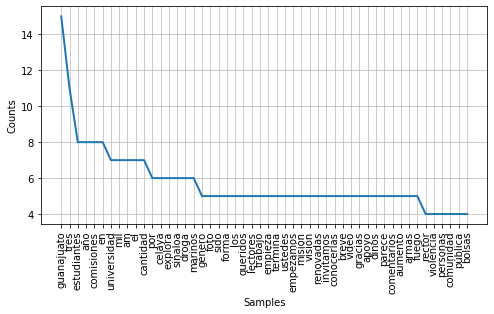

In [115]:
plt.figure(figsize=(8, 4))
word_frequency.plot(50)
plt.show()

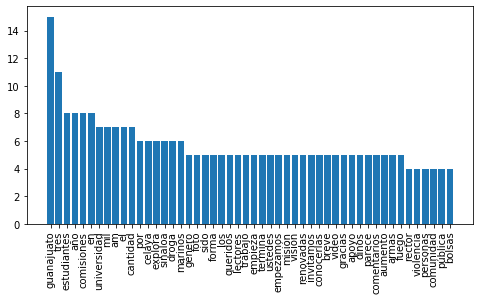

In [117]:
words, freqs = zip(*word_frequency.most_common(50))
indices = np.arange(len(words))
plt.figure(figsize=(8, 4))
plt.bar(words, freqs)
plt.xticks(indices, list(words), rotation='vertical', fontsize=10)
plt.show()

##### 7. Vocabulary size

In [118]:
print("Vocab size: ", len(word_frequency))

Vocab size:  555


##### 8. Words with length < 5 and frequency > 10

In [121]:
[w for w in word_frequency.keys() if len(w) < 5 and word_frequency[w] > 10]

['tres']

##### 9. Lexical diversity

In [122]:
print("Lexical diversity: ", len(noticia)/(len(set(noticia))))

Lexical diversity:  2.642526964560863


## Actividad 2: Cargando un corpus

##### 1. Carga dataset en corpus de categorias

In [42]:
from nltk.corpus.reader import CategorizedPlaintextCorpusReader

reader = CategorizedPlaintextCorpusReader('./', r'mex_train.*\.txt', cat_pattern=r'(\w+)/*')

In [43]:
reader.categories()

['mex_train', 'mex_train_labels']

#### 2. Tokenización con WordPunctTokenizer

In [44]:
from nltk.tokenize import WordPunctTokenizer 

tweets = reader.raw('mex_train.txt').split('\n')
tk = WordPunctTokenizer() 
word_punct_tokens = [tk.tokenize(tweets[i]) for i in range(len(tweets))]

In [24]:
word_punct_tokens[:10]

[['lo',
  'peor',
  'de',
  'todo',
  'es',
  'que',
  'no',
  'me',
  'dan',
  'por',
  'un',
  'tiempo',
  'y',
  'luego',
  'vuelven',
  'estoy',
  'hasta',
  'la',
  'verga',
  'de',
  'estl'],
 ['a',
  'la',
  'vga',
  'no',
  'seas',
  'mamón',
  '45',
  'putos',
  'minutos',
  'después',
  'me',
  'dices',
  'que',
  'apenas',
  'sales',
  'no',
  'me',
  'querías',
  'avisar',
  'en',
  '3',
  'horas',
  '?',
  '😑'],
 ['considero',
  'que',
  'lo',
  'más',
  'conveniente',
  'seria',
  'que',
  'lo',
  'retes',
  'a',
  'unos',
  'vergazos',
  'mi',
  'jelipe',
  '!',
  'rómpele',
  'la',
  'madre',
  'a',
  'ese',
  'pinchi',
  'joto',
  '!'],
 ['el',
  'marica',
  'de',
  'mi',
  'ex',
  'me',
  'tiene',
  'bloqueada',
  'de',
  'todo',
  'así',
  'uno',
  'no',
  'puede',
  'admirar',
  'la',
  '"',
  'belleza',
  '"',
  'de',
  'su',
  'garnacha',
  '😂'],
 ['mujer',
  'despechadaya',
  'pinche',
  'amlo',
  'hazle',
  'esta',
  'que',
  'se',
  'pela',
  'la',
  'loca',
  

#### 3. Tokenización con TweetTokenizer

In [25]:
from nltk.tokenize import TweetTokenizer

tk = TweetTokenizer()
tweet_tokens = [tk.tokenize(tweets[i]) for i in range(len(tweets))]

In [26]:
tweet_tokens[:10]

[['lo',
  'peor',
  'de',
  'todo',
  'es',
  'que',
  'no',
  'me',
  'dan',
  'por',
  'un',
  'tiempo',
  'y',
  'luego',
  'vuelven',
  'estoy',
  'hasta',
  'la',
  'verga',
  'de',
  'estl'],
 ['a',
  'la',
  'vga',
  'no',
  'seas',
  'mamón',
  '45',
  'putos',
  'minutos',
  'después',
  'me',
  'dices',
  'que',
  'apenas',
  'sales',
  'no',
  'me',
  'querías',
  'avisar',
  'en',
  '3',
  'horas',
  '?',
  '😑'],
 ['considero',
  'que',
  'lo',
  'más',
  'conveniente',
  'seria',
  'que',
  'lo',
  'retes',
  'a',
  'unos',
  'vergazos',
  'mi',
  'jelipe',
  '!',
  'rómpele',
  'la',
  'madre',
  'a',
  'ese',
  'pinchi',
  'joto',
  '!'],
 ['el',
  'marica',
  'de',
  'mi',
  'ex',
  'me',
  'tiene',
  'bloqueada',
  'de',
  'todo',
  'así',
  'uno',
  'no',
  'puede',
  'admirar',
  'la',
  '"',
  'belleza',
  '"',
  'de',
  'su',
  'garnacha',
  '😂'],
 ['mujer',
  'despechadaya',
  'pinche',
  'amlo',
  'hazle',
  'esta',
  'que',
  'se',
  'pela',
  'la',
  'loca',
  

#### 4. Ordenando tweets

In [45]:
tweets_label = reader.raw('mex_train_labels.txt').split('\n')[:-1]

In [46]:
tweets_no_agress = []
tweets_agress = []

for label, i in zip(tweets_label, range(len(tweets_label))):
    if label == '0':
        tweets_no_agress.append(tweets[i])
    else:
        tweets_agress.append(tweets[i])

In [47]:
tweets_no_agress.sort()
tweets_agress.sort()

#### 5. Estadísticas primeros 50 tweets clase positiva (agresivos)

In [69]:
total_words = 0
total_chars = 0

for i in range(50):
    total_words += len(tweets_agress[i].split())
    total_chars += len(list(tweets_agress[i]))
    
print("Longitud promedio palabras: {}".format(total_words/50))
print("Longitud promedio chars: {}\n".format(total_chars/50))

for i in range(50):
    diversidad = len(set(tweets_agress[i].split()))/len(tweets_agress[i].split())
    print("Diversidad léxica tweet {0}: {1}".format(i+1, diversidad))

Longitud promedio palabras: 14.84
Longitud promedio chars: 91.44

Diversidad léxica tweet 1: 1.0
Diversidad léxica tweet 2: 1.0
Diversidad léxica tweet 3: 0.782608695652174
Diversidad léxica tweet 4: 1.0
Diversidad léxica tweet 5: 0.9
Diversidad léxica tweet 6: 0.8666666666666667
Diversidad léxica tweet 7: 1.0
Diversidad léxica tweet 8: 1.0
Diversidad léxica tweet 9: 0.9444444444444444
Diversidad léxica tweet 10: 0.9411764705882353
Diversidad léxica tweet 11: 1.0
Diversidad léxica tweet 12: 0.9
Diversidad léxica tweet 13: 1.0
Diversidad léxica tweet 14: 0.9047619047619048
Diversidad léxica tweet 15: 1.0
Diversidad léxica tweet 16: 1.0
Diversidad léxica tweet 17: 1.0
Diversidad léxica tweet 18: 0.9
Diversidad léxica tweet 19: 1.0
Diversidad léxica tweet 20: 1.0
Diversidad léxica tweet 21: 1.0
Diversidad léxica tweet 22: 1.0
Diversidad léxica tweet 23: 0.8888888888888888
Diversidad léxica tweet 24: 0.9285714285714286
Diversidad léxica tweet 25: 0.9411764705882353
Diversidad léxica tweet 

#### 6. Comentario

Se puede observar que la diversidad léxica es generalmente cercana a 1, debido al tamaño de los tweets en cantidad de palabras, con promedio de 14.84 palabras por tweet para los primeros 50. Sería dificil encontrar un tweet con diversidad léxica baja ya que tendría que ser un tweet con muchas palabras repetidas. Podría ser un buen feature para detectar un tweet agresivo, si la diversidad léxica de los tweets no agresivos difiere significativamente de los agresivos.

En cuanto al promedio de palabras y caracteres, debido a que todos los tweets están restringidos en este aspecto, la mayoría de los tweets deberían tener longitudes similares por lo que no sería información muy útil.

#### 7. Visualización con ConditionalFreqDist

In [89]:
def tfidf(dist, tweets):
        
    df = {}
        
    for word in dist:
        for tweet in tweets:
            if word in tweet:
                if not word in df:
                    df[word] = 1
                else:
                    df[word] += 1
                    
    word_weights = {}
    
    for word in dist:
        word_weights[word] = dist[word]*np.log10((len(tweets)/df[word]))
        
    return word_weights

In [84]:
from nltk.probability import ConditionalFreqDist 

class_words = [("non-agressive", word) for tweet in tweets_no_agress for word in tweet.split()] + \
              [("agressive", word) for tweet in tweets_agress for word in tweet.split()]

cfd = nltk.ConditionalFreqDist(class_words)

Distribución palabras con mayor tfidf en clase de tweets no agresivos

In [107]:
word_weights = tfidf(cfd['non-agressive'], tweets_no_agress)
sorted_tfidf = sorted(word_weights.items(), key=lambda kv: kv[1], reverse = True)
sorted_tfidf[:5]

[('que', 633.774832856033),
 ('@usuario', 434.81176094240277),
 ('la', 426.5003667211991),
 ('no', 423.92427935850617),
 ('verga', 420.2612830702792)]

Distribución palabras con mayor tfidf en clase de tweets agresivos

In [108]:
word_weights = tfidf(cfd['agressive'], tweets_agress)
sorted_tfidf = sorted(word_weights.items(), key=lambda kv: kv[1], reverse = True)
sorted_tfidf[:5]

[('@usuario', 464.3855794155217),
 ('que', 356.40417182481343),
 ('los', 285.29132220799846),
 ('putos', 258.45026294330313),
 ('no', 223.75288546743838)]

Fijándose sólamente en las 5 palabras con mayor tfidf para cada clase, no parece haber mucha diferencia entre el tipo de palabras que son importantes. Esto debido a que incluso cuando el tweet contenga groserías esto no implica que se esté insultando a alguien, sino que también es relevante el orden de las palabras, lo cual se pierde al pasar a la representación BOW.

#### 8. Versión fonética

In [48]:
import pandas as pd

data = pd.read_csv("es.csv")
data = data.set_index('headword')

In [49]:
words_pron = []

for tweet in tweets:
    
    tweet_pron = []
    
    # Transforma cada tweet a su fonema palabra por palabra
    for word in tweet.split():
        
        # Se verifica si la palabra está incluida en el diccionario de fonemas
        try:
            item = data.loc[word]
            
            # Si la palabra tiene distintos fonemas se escoge el primero
            if len(item) > 1:
                w_fon = data.loc[word].iloc[0].pronunciation
            else:
                w_fon = data.loc[word].pronunciation
                
            if pd.isnull(w_fon):
                w_fon = word
                
            tweet_pron.append(w_fon.replace(" ", ""))
        
        # Si no se encuentra, se deja la palabra como su fonema
        except:
            tweet_pron.append(word)

    words_pron.append(" ".join(tweet_pron))

In [50]:
print(tweets[0])
print(words_pron[0])

lo peor de todo es que no me dan por un tiempo y luego vuelven estoy hasta la verga de estl
lo̞ peˈoɾ ðe ˈtoðo es ke no me dan ˈpoɾ ˈun ˈtjempo i ˈlweɣo vuelven estoy ˈasta la ˈbeɾɰa ðe estl


In [51]:
print(tweets[100])
print(words_pron[100])

birriero pendejo. y esos hacen birria joto lo que tragaste acá es barbacoa. 😘
birriero pendejo. i ˈesos hacen birria ˈxoto lo̞ ke tragaste aˈka es barbacoa. 😘


## Actividad 3: Detección de Agresividad con Análisis de Sentimiento Básico

#### Experimentos parte 1

In [25]:
from nltk.corpus.reader import CategorizedPlaintextCorpusReader
from collections import defaultdict
import pandas as pd
import numpy as np

emotions_dict = pd.read_csv("emolex.csv")
emotions_dict = emotions_dict.set_index('Spanish (es)')

reader = CategorizedPlaintextCorpusReader('./', r'mex.*\.txt', cat_pattern=r'(\w+)/*')

tweets_train = reader.raw('mex_train.txt').split('\n')[:-1]
labels_train = reader.raw('mex_train_labels.txt').split('\n')[:-1]
labels_train = list(map(int, labels_train))

tweets_val = reader.raw('mex_val.txt').split('\n')[:-1]
labels_val = reader.raw('mex_val_labels.txt').split('\n')[:-1]
labels_val = list(map(int, labels_val))

Función de bolsa de emociones binario

In [4]:
def emo_vect1(tweets, emotions_dict):
    
    words_emo = []

    for tweet in tweets:

        tweet_vect = np.zeros(len(emotions_dict.iloc[0]))

        # Transforma cada tweet a su vector de emociones
        for word in tweet.split():

            # Se verifica si la palabra está incluida en el diccionario de emociones
            try:
                if len(emotions_dict.loc[word]) == 1:
                    w_vect = np.array(emotions_dict.loc[word])
                else:
                    w_vect = np.array(emotions_dict.loc[word].sum(axis = 0, skipna = True))
                    
                tweet_vect = np.logical_or(w_vect, tweet_vect)
            except:
                pass

        tweet_vect = np.array(tweet_vect, dtype=int)
        words_emo.append(tweet_vect)
        
    return np.array(words_emo)

Función de bolsa de emociones frecuencia bruta

In [5]:
def emo_vect2(tweets, emotions_dict):
    
    words_emo = []

    for tweet in tweets:

        tweet_vect = np.zeros(len(emotions_dict.iloc[0]))

        # Transforma cada tweet a su vector de emociones
        for word in tweet.split():

            # Se verifica si la palabra está incluida en el diccionario de emociones
            try:
                if len(emotions_dict.loc[word]) == 1:
                    w_vect = np.array(emotions_dict.loc[word])
                else:
                    w_vect = np.array(emotions_dict.loc[word].sum(axis = 0, skipna = True))

                tweet_vect += np.array(w_vect)
            except:
                pass

        words_emo.append(tweet_vect)
        
    return np.array(words_emo)

Función de bolsa de emociones frecuencia normalizada

In [6]:
def emo_vect3(tweets, emotions_dict):
    
    words_emo = []

    for tweet in tweets:

        tweet_vect = np.zeros(len(emotions_dict.iloc[0]))

        # Transforma cada tweet a su vector de emociones
        for word in tweet.split():

            # Se verifica si la palabra está incluida en el diccionario de emociones
            try:
                if len(emotions_dict.loc[word]) == 1:
                    w_vect = np.array(emotions_dict.loc[word])
                else:
                    w_vect = np.array(emotions_dict.loc[word].sum(axis = 0, skipna = True))
                tweet_vect += np.array(w_vect)
            except:
                pass
            
        sum_emos = np.sum(tweet_vect)
        if sum_emos == 0:
            words_emo.append(tweet_vect)
        else:
            words_emo.append(tweet_vect/sum_emos)

    words_emo = np.array(words_emo)

    return words_emo

Función de bolsa de emociones tf-idf

In [7]:
def emo_vect4(tweets, emotions_dict):
    
    words_emo = []

    for tweet in tweets:

        tweet_vect = np.zeros(len(emotions_dict.iloc[0]))

        # Transforma cada tweet a su vector de emociones
        for word in tweet.split():

            # Se verifica si la palabra está incluida en el diccionario de emociones
            try:
                if len(emotions_dict.loc[word]) == 1:
                    w_vect = np.array(emotions_dict.loc[word])
                else:
                    w_vect = np.array(emotions_dict.loc[word].sum(axis = 0, skipna = True))
                tweet_vect += np.array(w_vect)
            except:
                pass
            
        words_emo.append(tweet_vect)

    words_emo = np.array(words_emo)
        
    for i in range(words_emo.shape[0]):
        emotions_index = np.nonzero(words_emo[i])[0]
        for j in emotions_index:
            num_tweets = len(np.nonzero(words_emo[:, j])[0])
            words_emo[i][j] = words_emo[i][j]*np.log10((words_emo.shape[0]/num_tweets) + 1)

    return words_emo

Función de bolsa de emociones tf-idf normalizado

In [10]:
def emo_vect5(tweets, emotions_dict):
    
    words_emo = []

    for tweet in tweets:

        tweet_vect = np.zeros(len(emotions_dict.iloc[0]))

        # Transforma cada tweet a su vector de emociones
        for word in tweet.split():

            # Se verifica si la palabra está incluida en el diccionario de emociones
            try:
                if len(emotions_dict.loc[word]) == 1:
                    w_vect = np.array(emotions_dict.loc[word])
                else:
                    w_vect = np.array(emotions_dict.loc[word].sum(axis = 0, skipna = True))
                tweet_vect += np.array(w_vect)
            except:
                pass
            
        words_emo.append(tweet_vect)

    words_emo = np.array(words_emo)
        
    for i in range(words_emo.shape[0]):
        emotions_index = np.nonzero(words_emo[i])[0]
        for j in emotions_index:
            num_tweets = len(np.nonzero(words_emo[:, j])[0])
            words_emo[i][j] = words_emo[i][j]*np.log10((words_emo.shape[0]/num_tweets) + 1)
            
    for i in range(words_emo.shape[0]):
        norm = np.linalg.norm(words_emo[i])

        if norm == 0:
            norm = 1

        words_emo[i] = words_emo[i]/norm

    return words_emo

Prueba función de bolsa de emociones binaria

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

BOW_train=emo_vect1(tweets_train, emotions_dict)
BOW_val=emo_vect1(tweets_val, emotions_dict)

grid.fit(BOW_train, labels_train) 

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_val, labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_val, labels_pred))
print(metrics.classification_report(labels_val, labels_pred))

[[242 155]
 [118 101]]
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       397
           1       0.39      0.46      0.43       219

    accuracy                           0.56       616
   macro avg       0.53      0.54      0.53       616
weighted avg       0.57      0.56      0.56       616



Prueba función de bolsa de emociones frecuencia bruta

In [120]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

BOW_train=emo_vect2(tweets_train, emotions_dict)
BOW_val=emo_vect2(tweets_val, emotions_dict)

grid.fit(BOW_train, labels_train) 

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_val, labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_val, labels_pred))
print(metrics.classification_report(labels_val, labels_pred))

[[225 172]
 [109 110]]
              precision    recall  f1-score   support

           0       0.67      0.57      0.62       397
           1       0.39      0.50      0.44       219

    accuracy                           0.54       616
   macro avg       0.53      0.53      0.53       616
weighted avg       0.57      0.54      0.55       616



/home/isaac/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Prueba función de bolsa de emociones frecuencia normalizada

In [124]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

BOW_train=emo_vect3(tweets_train, emotions_dict)
BOW_val=emo_vect3(tweets_val, emotions_dict)

grid.fit(BOW_train, labels_train) 

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_val, labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_val, labels_pred))
print(metrics.classification_report(labels_val, labels_pred))

[[240 157]
 [112 107]]
              precision    recall  f1-score   support

           0       0.68      0.60      0.64       397
           1       0.41      0.49      0.44       219

    accuracy                           0.56       616
   macro avg       0.54      0.55      0.54       616
weighted avg       0.58      0.56      0.57       616



Prueba función de bolsa de emociones tf-idf

In [125]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

BOW_train=emo_vect4(tweets_train, emotions_dict)
BOW_val=emo_vect4(tweets_val, emotions_dict)

grid.fit(BOW_train, labels_train) 

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_val, labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_val, labels_pred))
print(metrics.classification_report(labels_val, labels_pred))

[[229 168]
 [109 110]]
              precision    recall  f1-score   support

           0       0.68      0.58      0.62       397
           1       0.40      0.50      0.44       219

    accuracy                           0.55       616
   macro avg       0.54      0.54      0.53       616
weighted avg       0.58      0.55      0.56       616



/home/isaac/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Prueba función de bolsa de emociones tf-idf normalizado

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

BOW_train=emo_vect5(tweets_train, emotions_dict)
BOW_val=emo_vect5(tweets_val, emotions_dict)

grid.fit(BOW_train, labels_train) 

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_val, labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_val, labels_pred))
print(metrics.classification_report(labels_val, labels_pred))

[[236 161]
 [107 112]]
              precision    recall  f1-score   support

           0       0.69      0.59      0.64       397
           1       0.41      0.51      0.46       219

    accuracy                           0.56       616
   macro avg       0.55      0.55      0.55       616
weighted avg       0.59      0.56      0.57       616



#### Tabla comparación

| Representación | f1-score clase 0 | f1-score clase 1 | Accuracy |
| --- | --- | --- | --- |
| Binario | 0.64 | 0.43 | 0.56 |
| Frecuencia bruta | 0.62 | 0.44 | 0.54 |
| Frecuencia normalizada | 0.64 | 0.44 | 0.56 |
| tf-idf | 0.62 | 0.44 | 0.55 |
| tf-idf normalizado | 0.64 | 0.46 | 0.56 |

En general la representación con mejor resultado es tf-idf normalizado

#### Experimentos parte 2

In [38]:
import pandas as pd
import numpy as np

sel_emotions_dict = pd.read_csv("SEL_full.txt", sep='\t', encoding = "ISO-8859-1")
sel_emotions_dict = sel_emotions_dict.set_index('Palabra')

In [39]:
sel_emotions_dict.iloc[:10]

,Nula[%],Baja[%],Media[%],Alta[%],PFA,Categoría
Palabra,,,,,,
abundancia,0,0,50,50,0.830,Alegría
acabalar,40,0,60,0,0.396,Alegría
acallar,50,40,10,0,0.198,Alegría
acatar,50,40,10,0,0.198,Alegría
acción,30,30,30,10,0.397,Alegría
aceptable,0,20,80,0,0.594,Alegría
aceptación,0,20,50,30,0.696,Alegría
acicate,10,50,40,0,0.429,Alegría
aclamación,10,10,10,70,0.799,Alegría


#### Experimento parte 3

In [74]:
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [72]:
def word2fonetico(tweets, data):
    
    words_pron = []

    for tweet in tweets:

        tweet_pron = []

        # Transforma cada tweet a su fonema palabra por palabra
        for word in tweet.split():

            # Se verifica si la palabra está incluida en el diccionario de fonemas
            try:
                item = data.loc[word]

                # Si la palabra tiene distintos fonemas se escoge el primero
                if len(item) > 1:
                    w_fon = data.loc[word].iloc[0].pronunciation
                else:
                    w_fon = data.loc[word].pronunciation

                if pd.isnull(w_fon):
                    w_fon = word

                tweet_pron.append(w_fon.replace(" ", ""))

            # Si no se encuentra, se deja la palabra como su fonema
            except:
                tweet_pron.append(word)

        words_pron.append(" ".join(tweet_pron))
        
    return words_pron

In [73]:
import pandas as pd

data = pd.read_csv("es.csv")
data = data.set_index('headword')

In [92]:
from nltk.corpus.reader import CategorizedPlaintextCorpusReader
import nltk

reader = CategorizedPlaintextCorpusReader('./', r'mex.*\.txt', cat_pattern=r'(\w+)/*')

tweets_train = reader.raw('mex_train.txt').split('\n')[:-1]
tweets_sel_train = word2fonetico(tweets_train, data)
labels_train = reader.raw('mex_train_labels.txt').split('\n')[:-1]
labels_train = list(map(int, labels_train))

tweets_val = reader.raw('mex_val.txt').split('\n')[:-1]
tweets_sel_val = word2fonetico(tweets_val, data)
labels_val = reader.raw('mex_val_labels.txt').split('\n')[:-1]
labels_val = list(map(int, labels_val))

corpus_palabras = []
for doc in tweets_sel_train:
    corpus_palabras += doc.split()
fdist_pron = nltk.FreqDist(corpus_palabras)

V = sortFreqDict(fdist_pron)
V = V[:5000]

dict_indices = dict()
cont = 0
for weight, word in V:
    dict_indices[word] = cont
    cont += 1

Bolsa de palabras con SEL binario

In [70]:
def bow1(words_pron, V, dict_indices):
    BOW = np.zeros((len(tr_txt),len(V)), dtype=int)
    cont_doc = 0
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tr.split())
        for word in fdist_doc:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = 1
        cont_doc += 1

    return BOW

In [93]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

BOW_train=bow1(tweets_sel_train, V, dict_indices)
BOW_val=bow1(tweets_sel_val, V, dict_indices)

grid.fit(BOW_train, labels_train) 

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_val, labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_val, labels_pred))
print(metrics.classification_report(labels_val, labels_pred))

[[326  71]
 [ 58 161]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       397
           1       0.69      0.74      0.71       219

    accuracy                           0.79       616
   macro avg       0.77      0.78      0.77       616
weighted avg       0.79      0.79      0.79       616



Bolsa de palabras con SEL tf

In [7]:
def bow2(tr_txt, V, dict_indices):
    BOW = np.zeros((len(tr_txt),len(V)), dtype=int)
    cont_doc = 0
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tr.split())
        for word in fdist_doc:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = fdist_doc[word]
        cont_doc += 1
        
    return BOW

In [78]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

BOW_train=bow2(tweets_sel_train, V, dict_indices)
BOW_val=bow2(tweets_sel_val, V, dict_indices)

grid.fit(BOW_train, labels_train) 

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_val, labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_val, labels_pred))
print(metrics.classification_report(labels_val, labels_pred))

[[327  70]
 [ 54 165]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       397
           1       0.70      0.75      0.73       219

    accuracy                           0.80       616
   macro avg       0.78      0.79      0.78       616
weighted avg       0.80      0.80      0.80       616



Bolsa de palabras con SEL tf normalizado

In [79]:
def bow3(tr_txt, V, dict_indices):
    BOW = np.zeros((len(tr_txt),len(V)), dtype=np.float64)
    cont_doc = 0
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tr.split())
        total = sum(fdist_doc.values())
        
        if total == 0:
            total = 1

        for word in fdist_doc:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] += fdist_doc[word]/total
        cont_doc += 1
        
    return BOW

In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

BOW_train=bow3(tweets_sel_train, V, dict_indices)
BOW_val=bow3(tweets_sel_val, V, dict_indices)

grid.fit(BOW_train, labels_train) 

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_val, labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_val, labels_pred))
print(metrics.classification_report(labels_val, labels_pred))

[[310  87]
 [ 51 168]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       397
           1       0.66      0.77      0.71       219

    accuracy                           0.78       616
   macro avg       0.76      0.77      0.76       616
weighted avg       0.79      0.78      0.78       616



Bolsa de palabras con SEL tf-idf

In [81]:
def bow4(tr_txt, V, dict_indices):
    
    BOW = np.zeros((len(tr_txt),len(V)), dtype=np.float64)
    cont_doc = 0
    
    df = {}
    
    for word in dict_indices.keys():
        for tr in tr_txt:
            if word in tr:
                if not word in df:
                    df[word] = 1
                else:
                    df[word] += 1
    
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tr.split())
        for word in fdist_doc:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = fdist_doc[word]*np.log10((len(tr_txt)/df[word]))
        cont_doc += 1
        
    return BOW

In [82]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

BOW_train=bow4(tweets_sel_train, V, dict_indices)
BOW_val=bow4(tweets_sel_val, V, dict_indices)

grid.fit(BOW_train, labels_train) 

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_val, labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_val, labels_pred))
print(metrics.classification_report(labels_val, labels_pred))

[[325  72]
 [ 66 153]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       397
           1       0.68      0.70      0.69       219

    accuracy                           0.78       616
   macro avg       0.76      0.76      0.76       616
weighted avg       0.78      0.78      0.78       616



Bolsa de palabras con SEL tf- normalizado

In [84]:
def bow5(tr_txt, V, dict_indices):
    
    BOW = np.zeros((len(tr_txt),len(V)), dtype=np.float64)
    cont_doc = 0
    
    df = {}
    
    for word in dict_indices.keys():
        for tr in tr_txt:
            if word in tr:
                if not word in df:
                    df[word] = 1
                else:
                    df[word] += 1
    
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tr.split())
        for word in fdist_doc:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = fdist_doc[word]*np.log10((len(tr_txt)/df[word]))
        cont_doc += 1
        
        
    for i in range(BOW.shape[0]):
        norm = np.linalg.norm(BOW[i])

        if norm == 0:
            norm = 1

        BOW[i] = BOW[i]/norm
        
    return BOW

In [85]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

BOW_train=bow5(tweets_sel_train, V, dict_indices)
BOW_val=bow5(tweets_sel_val, V, dict_indices)

grid.fit(BOW_train, labels_train) 

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_val, labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_val, labels_pred))
print(metrics.classification_report(labels_val, labels_pred))

[[314  83]
 [ 51 168]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       397
           1       0.67      0.77      0.71       219

    accuracy                           0.78       616
   macro avg       0.76      0.78      0.77       616
weighted avg       0.79      0.78      0.79       616



#### Tabla comparativa

| Representación | f1-score clase 0 | f1-score clase 1 | Accuracy |
| --- | --- | --- | --- |
| Binario | 0.83 | 0.71 | 0.79 |
| Frecuencia bruta | 0.84 | 0.73 | 0.80 |
| Frecuencia normalizada | 0.82 | 0.71 | 0.78 |
| tf-idf | 0.82 | 0.69 | 0.78 |
| tf-idf normalizado | 0.82 | 0.71 | 0.78 |

En general la representación con mejor resultado es frecuencua burta (TF)

#### Experimentos parte 4

In [1]:
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [2]:
def emo_vect_tfidf_norm(tweets, emotions_dict):
    
    words_emo = []

    for tweet in tweets:

        tweet_vect = np.zeros(len(emotions_dict.iloc[0]))

        # Transforma cada tweet a su vector de emociones
        for word in tweet.split():

            # Se verifica si la palabra está incluida en el diccionario de emociones
            try:
                if len(emotions_dict.loc[word]) == 1:
                    w_vect = np.array(emotions_dict.loc[word])
                else:
                    w_vect = np.array(emotions_dict.loc[word].sum(axis = 0, skipna = True))
                tweet_vect += np.array(w_vect)
            except:
                pass
            
        words_emo.append(tweet_vect)

    words_emo = np.array(words_emo)
        
    for i in range(words_emo.shape[0]):
        emotions_index = np.nonzero(words_emo[i])[0]
        for j in emotions_index:
            num_tweets = len(np.nonzero(words_emo[:, j])[0])
            words_emo[i][j] = words_emo[i][j]*np.log10((words_emo.shape[0]/num_tweets) + 1)
            
    for i in range(words_emo.shape[0]):
        norm = np.linalg.norm(words_emo[i])

        if norm == 0:
            norm = 1

        words_emo[i] = words_emo[i]/norm

    return words_emo

In [3]:
def word2fonetico(tweets, data):
    
    words_pron = []

    for tweet in tweets:

        tweet_pron = []

        # Transforma cada tweet a su fonema palabra por palabra
        for word in tweet.split():

            # Se verifica si la palabra está incluida en el diccionario de fonemas
            try:
                item = data.loc[word]

                # Si la palabra tiene distintos fonemas se escoge el primero
                if len(item) > 1:
                    w_fon = data.loc[word].iloc[0].pronunciation
                else:
                    w_fon = data.loc[word].pronunciation

                if pd.isnull(w_fon):
                    w_fon = word

                tweet_pron.append(w_fon.replace(" ", ""))

            # Si no se encuentra, se deja la palabra como su fonema
            except:
                tweet_pron.append(word)

        words_pron.append(" ".join(tweet_pron))
        
    return words_pron

In [8]:
def bow2(tr_txt, V, dict_indices):
    BOW = np.zeros((len(tr_txt),len(V)), dtype=int)
    cont_doc = 0
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tr.split())
        for word in fdist_doc:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = fdist_doc[word]
        cont_doc += 1
        
    return BOW

In [4]:
from nltk.corpus.reader import CategorizedPlaintextCorpusReader
import pandas as pd
import numpy as np
import nltk

# Recurso de emociones CANADA
emotions_dict = pd.read_csv("emolex.csv")
emotions_dict = emotions_dict.set_index('Spanish (es)')

# Recurso fonetico
data = pd.read_csv("es.csv")
data = data.set_index('headword')

# Lee corpus de tweets
reader = CategorizedPlaintextCorpusReader('./', r'mex.*\.txt', cat_pattern=r'(\w+)/*')

tweets_train = reader.raw('mex_train.txt').split('\n')[:-1]
labels_train = reader.raw('mex_train_labels.txt').split('\n')[:-1]
labels_train = list(map(int, labels_train))

tweets_val = reader.raw('mex_val.txt').split('\n')[:-1]
labels_val = reader.raw('mex_val_labels.txt').split('\n')[:-1]
labels_val = list(map(int, labels_val))

Construye BOW tradicional

In [5]:
corpus_palabras = []
for doc in tweets_train:
    corpus_palabras += doc.split()
fdist = nltk.FreqDist(corpus_palabras)

V = sortFreqDict(fdist)
V = V[:5000]

dict_indices = dict()
cont = 0
for weight, word in V:
    dict_indices[word] = cont
    cont += 1

Construye BOW fonético

In [6]:
tweets_fon_train = word2fonetico(tweets_train, data)
tweets_fon_val = word2fonetico(tweets_val, data)

corpus_palabras_fonetico = []
for doc in tweets_fon_train:
    corpus_palabras_fonetico += doc.split()
fdist_pron = nltk.FreqDist(corpus_palabras_fonetico)

V_fon = sortFreqDict(fdist_pron)
V_fon = V[:5000]

dict_indices_fon = dict()
cont = 0
for weight, word in V_fon:
    dict_indices_fon[word] = cont
    cont += 1

Entrenamiento y evaluación

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

BOW_train_trad=bow2(tweets_train, V, dict_indices)
BOW_val_trad=bow2(tweets_val, V, dict_indices)

BOW_train_emo=emo_vect_tfidf_norm(tweets_train, emotions_dict)
BOW_val_emo=emo_vect_tfidf_norm(tweets_val, emotions_dict)

#BOW_train_fon=bow2(tweets_fon_train, V_fon, dict_indices_fon)
#BOW_val_fon=bow2(tweets_fon_val, V_fon, dict_indices_fon)

BOW_train = np.concatenate((BOW_train_trad, BOW_train_emo), axis=1)
BOW_val = np.concatenate((BOW_val_trad, BOW_val_emo), axis=1)

grid.fit(BOW_train, labels_train) 

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_val, labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_val, labels_pred))
print(metrics.classification_report(labels_val, labels_pred))